<div align = "center">
<h1> SENTIMENT ANALYSIS USING NEURAL NETWORKS </h1>
<h2> Jaouad Safouani </h2>
</div>

* [A1:RESEARCH QUESTION](#A1)
* [A2:OBJECTIVES AND GOALS](#A2)
* [A3:PRESCRIBED NETWORK](#A3)
* [B1:DATA EXPLORATION](#B1) 
* [B2:TOKENIZATION](#B2)
* [B3:PADDING PROCESS](#B3) 
* [B4:CATEGORIES OF SENTIMENT](#B4)
* [B5:STEPS TO PREPARE THE DATA](#B5) 
* [B6:PREPARED DATASET](#B6)
* [C1:MODEL SUMMARY](#C1) 
* [C2:NETWORK ARCHITECTURE](#C2)
* [C3:HYPERPARAMETERS](#C3) 
* [D1:STOPPING CRITERIA](#D1) 
* [D2:TRAINING PROCESS](#D2) 
* [D3:FIT](#D3) 
* [D4:PREDICTIVE ACCURACY](#D4)
* [E:CODE](#E)
* [F:FUNCTIONALITY](#F)
* [G:RECOMMENDATIONS](#G)
* [H:REPORTING](#H)
* [I:SOURCES FOR THIRD-PARTY CODE](#I)
* [J:SOURCES](#J)

<h2> <a id="A1"> A1:RESEARCH QUESTION </a> </h2>

WGU Telecommunication WGU has retails stores and online stores. The Company sell a variety of products from cellphone accessories to movies. The Company is trying to analyze the products review from three different platorms, Amazon, Yelp and Imdb, and predict if the reviews are negative or positive. This analysis will help the company to optimize sales performance of products it is selling based on customer reviews. By using a Natural Language Processing a algoritm the company will be able to identify products with negative reviews from the positive ones. Hence, the comapny will be able to stock more of the products with Postive reviews. Can we implement a sentiment score within the ERP system to help our purchasing and marketing departments to make product restocking decision based on how customer reacts to them in reviews? 

<h2> <a id="A2"> A2:OBJECTIVES AND GOALS  </a> </h2>

 The goal of this project is to create Natural Language Processing algorithm with an API using Tensorflow and Keras to predict if a review about a product was Positive or Negative. We will clean and combine the three review datasets: Imdb, Yelp, and Amazon. The model will be used in custom ERP system, The application will call the model and run a certain product reviews to get a sentiment score. This score will help the purchasing and marketing department to make decisions about products restocking.

<h2> <a id="A3"> A3:PRESCRIBED NETWORK </a> </h2>

We will create a compiled model using Keras and TensorFlow Tokens. We will tune the model and retrained to get to a well performing model accuracy wise, and avoid overfitting. 

<h2> <a id="B1"> B1:DATA EXPLORATION </a> </h2>

In [1]:
#importing libraries
import pandas as pd 
# display all columns in dataframes.
pd.set_option('max_columns', None)
# display all rows in dataframes
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid", color_codes=False)
import string
punctuation = string.punctuation
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import callbacks
from spacy.lang.en.stop_words import STOP_WORDS
stop_words= list(STOP_WORDS)
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import TfidfVectorizer

<h3> <a id=""> Loading amazon_cells_labelled dataset </a> </h3>

In [2]:
df_amz = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t',header=None)
df_amz.columns = ["review", "sentiment"]              

In [3]:
df_amz.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
df_amz.shape

(1000, 2)

In [5]:
df_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df_amz.describe()

,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
df_amz.duplicated().sum()

10

In [8]:
df_amz.drop_duplicates(inplace=True)

In [9]:
df_amz.duplicated().sum()

0

<h3> <a id=""> Loading imdb_labelled dataset </a> </h3>

In [10]:
df_imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t',header=None)
df_imdb.columns = ["review", "sentiment"]   


In [11]:
df_imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [13]:
df_imdb.shape

(748, 2)

In [14]:
df_imdb.describe()

,sentiment
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [15]:
df_imdb.duplicated().sum()

3

In [16]:
df_imdb.drop_duplicates(inplace=True)

In [17]:
df_imdb.duplicated().sum()

0

<h3> <a id=""> Loading yelp_labelled dataset </a> </h3>

In [18]:
df_yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t',header=None)
df_yelp.columns = ["review", "sentiment"]   

In [19]:
df_yelp.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [21]:
df_yelp.shape

(1000, 2)

In [22]:
df_yelp.describe()

,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [23]:
df_yelp.duplicated().sum()

4

In [24]:
df_yelp.drop_duplicates(inplace=True)

In [25]:
df_yelp.duplicated().sum()

0

<h3> <a id="">  Combining the three datasets </a> </h3>

In [26]:
df =df_amz.append([df_yelp,df_imdb], ignore_index=True)

In [27]:
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


The dataset contains two variables:
* review: written reviews written by customer in the amazon site.
* sentiment:  has 1 and 0 values 1 for postive review, 0 for negative review.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2731 non-null   object
 1   sentiment  2731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.8+ KB


In [29]:
df.shape

(2731, 2)

In [30]:
df.describe()

,sentiment
count,2731.000000
mean,0.503845
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [31]:
df.duplicated().sum()

0

In [32]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

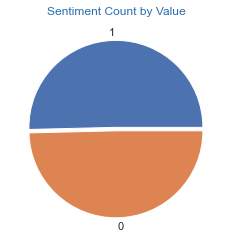

In [33]:
df['sentiment'].value_counts().plot(kind ='pie', label ='',  explode= (0.02, 0.02))
plt.title('Sentiment Count by Value', color='#296eaa')
labels=list(df['sentiment'].value_counts())
plt.show()

In [34]:
df['sentiment'].value_counts()

1    1376
0    1355
Name: sentiment, dtype: int64

 <h3> <a id=""> Spliting data to predictor and output</a> </h3>

In [35]:
x = df['review']
y = df['sentiment']

<h2> <a id="B2"> B2:TOKENIZATION </a> </h2>

In [36]:
test_review = df_imdb.head()['review'][0]
test_review

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

<h3> <a id=""> Change text to lower case </a> </h3>

In [37]:
def text_to_lower_case(review):
    ''' Convert text to lower Case and ignore Proper Names'''
    doc_ = nlp(review)
    tokens_list = [] # list of tokens
    for token in doc_:
        if token.lemma_ != "-PRON-":
            word = token.lemma_.lower().strip()
        else:
            word = token.lower_
        tokens_list.append(word)
    return tokens_list

In [38]:
# test_token_ = text_to_lower_case(test_review)

<h3> <a id=""> Remove stopwords and punctuation </a> </h3>

In [39]:
def remove_stop_words_and_punctuation(tokens_list):
    cleaned_tokens = []
    for token in tokens_list:
        if token not in stop_words and token not in punctuation:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [40]:
# remove_stop_words_and_punctuation(test_token_)

<h3> <a id=""> Text Cleaning </a> </h3>

In [41]:
def text_cleaning(review):
    ''' Convet text to lower Case, ignores Proper Name,
    then it removes stop words and punctuations'''
    tokens_list = text_to_lower_case(review)
    tokens_clean = remove_stop_words_and_punctuation(tokens_list)
    return tokens_clean

In [42]:
text_cleaning(test_review)

['slow', 'aimless', 'movie', 'distressed', 'drift', 'young', 'man']

<h3> <a id=""> Applying Text Cleaning and creating Clean_Text variable </a> </h3>

In [43]:
df['review_cleaned_text']=df['review'].apply(text_cleaning)

In [44]:
df.head()

,review,sentiment,review_cleaned_text
0,So there is no way for me to plug it in here i...,0,"[way, plug, converter]"
1,"Good case, Excellent value.",1,"[good, case, excellent, value]"
2,Great for the jawbone.,1,"[great, jawbone]"
3,Tied to charger for conversations lasting more...,0,"[tie, charger, conversation, 45, minute, major..."
4,The mic is great.,1,"[mic, great]"


In [45]:
df = df[['review_cleaned_text','sentiment']]

In [46]:
df.head()

,review_cleaned_text,sentiment
0,"[way, plug, converter]",0
1,"[good, case, excellent, value]",1
2,"[great, jawbone]",1
3,"[tie, charger, conversation, 45, minute, major...",0
4,"[mic, great]",1


In [47]:
count_text=[]
for text in df['review_cleaned_text']:
    count_text.append(len(text))
print('max word count: ', max(count_text)  )
max_len = 125

max word count:  679


<h3> <a id=""> Spliting data into training and testing datasets </a> </h3>

In [48]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)
print('X_train: {} x_test: {} Y_train: {} y_test: {}'.format(len(X_train), len(x_test), len(Y_train), len(y_test)))

X_train: 2184 x_test: 547 Y_train: 2184 y_test: 547


<h2> <a id="B3"> B3:PADDING PROCESS </a> </h2>

In [49]:
vocab_size = 5000 # make the top list of words (common words)
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .8
# (Virahonda, 2020)

In [50]:
# Initializing the Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Fitting the tokenizer
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# initializing X_train_texts_to_sequences_
X_train_texts_to_sequences_ = tokenizer.texts_to_sequences(X_train)

# Set X_train_padded
X_train_padded = pad_sequences(X_train_texts_to_sequences_,
                               maxlen=max_len,
                               padding=padding_type,
                               truncating=trunc_type)

# # initializing x_test_texts_to_sequences_
x_test_texts_to_sequences_= tokenizer.texts_to_sequences(x_test)
# # Set Y_train_padded
x_test_padded = pad_sequences(x_test_texts_to_sequences_,
                              maxlen=max_len, 
                              padding=padding_type,
                              truncating=trunc_type)
# (Virahonda, 2020)

In [51]:
# x_test

<h2> <a id="B4"> B4:CATEGORIES OF SENTIMENT </a> </h2>

In [52]:
list(df['sentiment'].unique())

[0, 1]

There are two sentiment categories 1 and 0, 1 stands for postive review and 0 stands for negative review

<h2> <a id="B5"> B5:STEPS TO PREPARE THE DATA </a> </h2>

I took the following steps to prepare the data:
* I loaded the data from three datasets (Yelp, Amazon, Imdb) using pandas
* I renamed the headers for each data set to Review and sentiment.
* removed duplicates from each dataset
* I did exploratory analysis on each dataset
* I appended the three datasets into one called df
* I created a function that calls two other functions to convert text to lower case with respect to English proper names, and to remove the punctuations and split the words with a review into a list of tokens.
* I applied the function to the review variable and created a new variable review_cleaned_text with the clean list of tokens
* I dropped the original review column.
* I saved prepared dataset to csv

Please see code above for data cleaning and preparation.

<h2> <a id="B6"> B6:PREPARED DATASET </a> </h2>

In [53]:
df.to_csv('prepared_dataset.csv')

Please see attached prepared_dataset.csv 

<h2> <a id="C1"> C1:MODEL SUMMARY </a> </h2>

<h3> <a id=""> Model creation </a> </h3>

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The output sentiment is 0 or 1; therefore, we will use the sigmoid as the activation method to get the higher model accuracy. 
we will use the same parameters used in tokonizer for the embbeed layer, 5000 for the number of words to be used in training, 200 max word per review as the input length. 

<h3> <a id=""> Model Compiling </a> </h3>

We will be using the Keras model adam as optimizer as it is well optimized for binary classification based on text input. And we wil use the binary_crossentropy as the loss function to evaluate the loss. For the purpose of simplifying the code We will use the model.compile with loss, opimizer and metrics as parameters.

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<h3> <a id=""> Model Summary </a> </h3>

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 64)           320000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 320,723
Trainable params: 320,723
Non-trainable params: 0
__________________________________________________

<h3> <a id=""> Model Training </a> </h3>

Training the model for 20 epochs

In [57]:
intial_model = model.fit(X_train_padded, Y_train,
                          epochs=70, validation_data=(x_test_padded,y_test))

Epoch 1/70
69/69 [==============================] - 1s 6ms/step - loss: 0.7621 - accuracy: 0.4954 - val_loss: 0.7267 - val_accuracy: 0.4991
Epoch 2/70
69/69 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.4954 - val_loss: 0.7004 - val_accuracy: 0.4991
Epoch 3/70
69/69 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4954 - val_loss: 0.6941 - val_accuracy: 0.4991
Epoch 4/70
69/69 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.4991
Epoch 5/70
69/69 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4954 - val_loss: 0.6929 - val_accuracy: 0.4991
Epoch 6/70
69/69 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5105 - val_loss: 0.6928 - val_accuracy: 0.5192
Epoch 7/70
69/69 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5751 - val_loss: 0.6927 - val_accuracy: 0.5192
Epoch 8/70
69/69 [==

In [58]:
# x_test_padded, x_test

<h3> <a id=""> Create DataFrame from the intial_model metrics  </a> </h3>

In [59]:
initial_model_metric_df = pd.DataFrame(zip(intial_model.history['accuracy'],
                      intial_model.history['val_accuracy'],
                      intial_model.history['loss'],
                      intial_model.history['val_loss']
                     ), columns =['Training Accuracy',
                                  'Validation Accuracy',
                                  'Training Loss',
                                  'Validation Loss'])
initial_model_metric_df.head()

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,0.495421,0.499086,0.762131,0.726676
1,0.495421,0.499086,0.713018,0.700381
2,0.495421,0.499086,0.696927,0.694124
3,0.495421,0.499086,0.693584,0.693058
4,0.495421,0.499086,0.692932,0.692906


<h3> <a id=""> Plotting intial_model metrics </a> </h3>

In [60]:
def plot_line(metric):
    plt.figure(figsize=(14,5))
    plt.plot(initial_model_metric_df[metric], label= metric)
    plt.title(metric + ' vs  Epoch', fontsize = 18, fontweight='bold', color ='#296eaa')
    plt.xlabel('# Epoch',fontweight='bold', color ='#296eaa',fontsize = 14)
    plt.ylabel(metric ,fontweight='bold', color ='#296eaa',fontsize = 14)
    plt.legend(loc="best")
    plt.show()

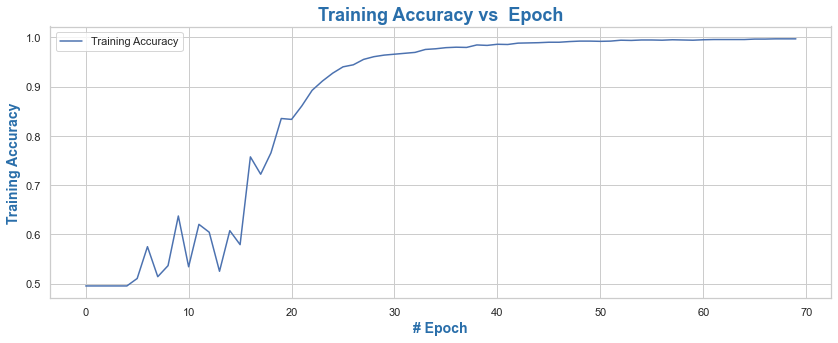

In [61]:
plot_line('Training Accuracy')

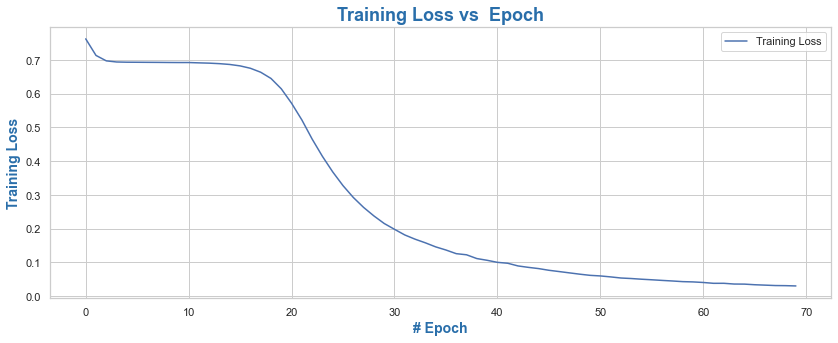

In [62]:
plot_line('Training Loss')

In [63]:
list(initial_model_metric_df.columns)

['Training Accuracy',
 'Validation Accuracy',
 'Training Loss',
 'Validation Loss']

In [64]:
def metrics_comparaison(metric):
    plt.figure(figsize=(16,6))
    Training = initial_model_metric_df['Training ' + metric]
    Validation =initial_model_metric_df['Validation ' + metric]

    plt.plot(Training, color='black', label = 'Training ' + metric)
    plt.plot(Validation, color='red', label= 'Validation ' + metric)

    plt.title('Accuracy: Training vs Validation', fontsize = 18, fontweight='bold', color ='#296eaa')
    plt.xlabel('# Epoch',fontweight='bold', color ='#296eaa',fontsize = 14)
    plt.ylabel(metric,fontweight='bold', color ='#296eaa',fontsize = 14)
    plt.legend()
    plt.show()

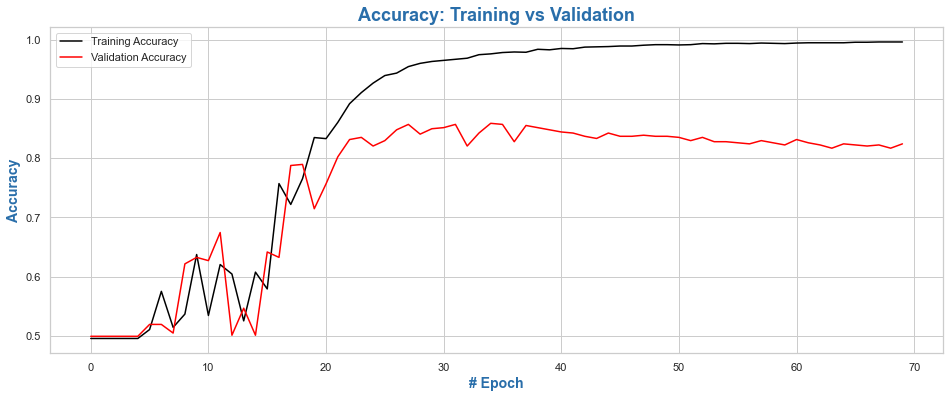

In [65]:
metrics_comparaison('Accuracy')

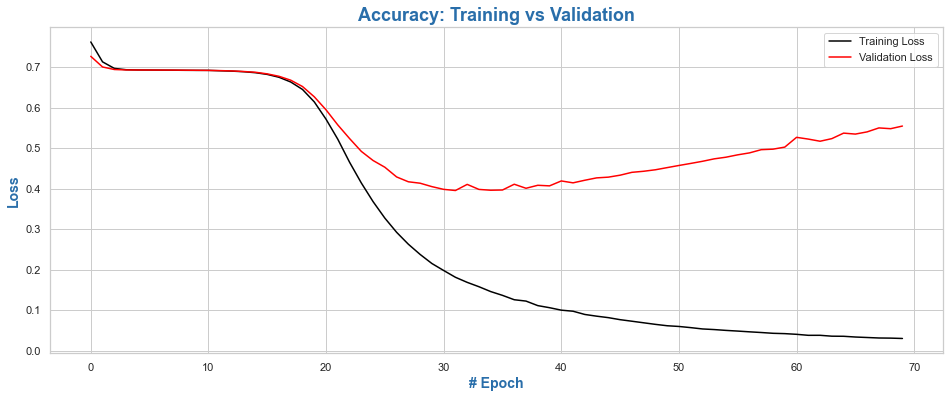

In [66]:
metrics_comparaison('Loss')

In this model the Loss metric is the same as minimum absolute errors.

<h3> <a id=""> Fitting Final_model </a> </h3>

Prevent overfitting in Final_model using Early stopping.

In [67]:
early_stopping = callbacks.EarlyStopping(monitor= "val_loss", 
                                         mode= "min", patience= 5, restore_best_weights= True)

In [68]:
# Running model again

In [69]:
final_model = model.fit(X_train_padded, Y_train,
                   epochs=25, validation_data=(x_test_padded, y_test), callbacks = [early_stopping])

Epoch 1/25
69/69 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9973 - val_loss: 0.5566 - val_accuracy: 0.8227
Epoch 2/25
69/69 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9973 - val_loss: 0.5622 - val_accuracy: 0.8172
Epoch 3/25
69/69 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9968 - val_loss: 0.5639 - val_accuracy: 0.8208
Epoch 4/25
69/69 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9973 - val_loss: 0.5680 - val_accuracy: 0.8208
Epoch 5/25
69/69 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9973 - val_loss: 0.5738 - val_accuracy: 0.8208
Epoch 6/25
69/69 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9973 - val_loss: 0.5842 - val_accuracy: 0.8318


In [70]:
final_model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 125, 64)           320000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 320,723
Trainable params: 320,723
Non-trainable params: 0
__________________________________________________

The early stop algoritm stopped the model fitting at training accuracy 0.99 and validation accuracy of 0.83 of .We can clearly see that the Final model is able to predict the sentiment with an accuracy of 0.83, The accuracy maxed out at 6 epochs to prevent overfitting.

<h3> <a id=""> Testing Final_model with simple reviews </a> </h3>

In [71]:
def model_prediction(sentence):
    ''' This function predicts if a review is Negative or Postive'''
    txt = []
    txt.append(sentence)
    X_train_txt_ = tokenizer.texts_to_sequences(txt)
    X_txt_padded = pad_sequences(X_train_txt_,
                                   maxlen=max_len,
                                   padding=padding_type,
                                   truncating=trunc_type)

    pred = np.round(final_model.model.predict(X_txt_padded))[0][0].astype('int64')
    sentiment_label = {0:'Negative',1:'Positive'}
    return sentiment_label[pred]

In [75]:
model_prediction('this starbucks is awful dude' )

'Negative'

In [73]:
model_prediction('that was some lovely movie' )

'Positive'

<h2> <a id="C2"> C2:NETWORK ARCHITECTURE </a> </h2>

The model was architected as follows:

* Activation: Sigmoid outputs 1 positive values, and 0 for negative values. This is used due to score being either 1, or 0.

* The number of nodes per layer: First we calculate the square root of the number of features and then we use values near to it, and see how it effects the accuracy. Ten nodes for each of the first two layers, and one node in the final layer produce an accuracy of over 99.8%

* Loss function = BinaryCrossentropy. BinaryCrossentropy is suited for binary classification.

* Optimizer = Adam. Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.. (prakharr0y,2020)

<h2> <a id="C3"> C3:HYPERPARAMETERS </a> </h2>

The final model was opimized for accuracy using the adam optimizer with binary_crossentropy as the loss function. Using padding and the embedding with loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']). I also used 65000 words to with dimension to train the model.

<h2> <a id="A1"> D1:STOPPING CRITERIA </a> </h2>

To revent overfitting in Final_model I used Early stopping with the the following paramters:
monitor= "val_loss", mode= "min", patience= 5, restore_best_weights= True). This will allows us to come up with the best model  possible by reducing the loss with best accuracy.

<h2> <a id="D2"> D2:TRAINING PROCESS </a> </h2>

Please see previous steps for details:
In the other hand, here is sumamary of the training process:

* Padded the X_train and Y_test datasets
* Set the initial model paramters
* Created initial model using keras
* Compiled initial model, with accuracy as metric we aimed to increase and used Adam Optimizer and Loss function = BinaryCrossentropy
* Fitted the initial model
* Trained the initial model with 70 epochs
* Did Exploratory analysis on model history metrics
* visualized the Loss and Accuracy for trainin and validation.
* Used early stopping to stop training the model when the loss start increasing (minimum absolute errors) to avoid overfitting.
* Rerun the training of the model with early stopping and created Final Model that is well performing and generated accuracy and loss metrics.
* Run some test predictions using random sentences and the model seems to performing well.

<h2> <a id="D3"> D3:FIT</a> </h2>

Please see C1: Model Summary

<h2> <a id="D4"> D4:PREDICTIVE ACCURACY </a> </h2>

Please see C1: Model Summary

<h2> <a id="E"> E:CODE </a> </h2>

Please see code above

<h2> <a id="F"> F:FUNCTIONALITY </a> </h2>

The model consits of a neural network with high accuracy score. The model generlized well; therefore, this model can be used with different dataset or queries from ERP system. The ERP system will be able to cummunicate with the NLP model through an API to calculate the sentiment score.

<h2> <a id="A1"> G:RECOMMENDATIONS </a> </h2>

 The model validation shows that the model performs well based on the %99 accuracy score in predicting if a product review is postive or negative. Therefore, We recommend to implment the sentiment score in ERP system. This new feature should help the marketing and purachasing departement restock more of the products with postive reviews.

<h2> <a id="I"> I:SOURCES FOR THIRD-PARTY CODE </a> </h2>

Keras API reference. Optimizers. 8/5/2022. <https://keras.io/api/optimizers/?msclkid=a31f9eb1cf0d11eca8f474f822e8b126>

Virahonda, Sergio. 10/08/2020. <https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91>

<h2> <a id="J"> J:SOURCES </a> </h2>

Keras API reference. Optimizers. 8/5/2022. <https://keras.io/api/optimizers/?msclkid=a31f9eb1cf0d11eca8f474f822e8b126>4

Virahonda, Sergio. 10/08/2020. <https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91>

prakharr0y. 10/24/2020.<https://www.geeksforgeeks.org/intuition-of-adam-optimizer/?msclkid=688a74becf6411ecbff173a0afe145db>